# define Time Series based on annual frequency

In [2]:
data = [446.6565,454.4733,455.663,423.6322,456.2713,440.5881,425.3325,485.1494,506.0482,526.792,514.2689,494.211]

In [3]:
data

[446.6565,
 454.4733,
 455.663,
 423.6322,
 456.2713,
 440.5881,
 425.3325,
 485.1494,
 506.0482,
 526.792,
 514.2689,
 494.211]

In [4]:
#Define a fixed frequency 'DatetimeIndex' corresponding to data
index = pd.date_range(start = '1996',end='2008',freq='A')

In [5]:
index

DatetimeIndex(['1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31',
               '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [6]:
type(index)

pandas.core.indexes.datetimes.DatetimeIndex

In [7]:
#Time Series Data
oildata = pd.Series(data,index)

In [8]:
oildata

1996-12-31    446.6565
1997-12-31    454.4733
1998-12-31    455.6630
1999-12-31    423.6322
2000-12-31    456.2713
2001-12-31    440.5881
2002-12-31    425.3325
2003-12-31    485.1494
2004-12-31    506.0482
2005-12-31    526.7920
2006-12-31    514.2689
2007-12-31    494.2110
Freq: A-DEC, dtype: float64

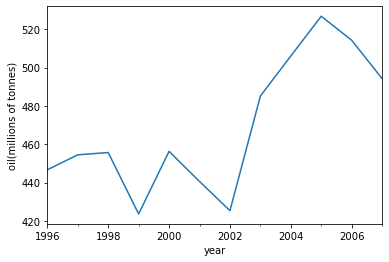

oil production in saudi Arabia from 1996 to 2007


In [9]:
ax = oildata.plot()
ax.set_xlabel('year')
ax.set_ylabel('oil(millions of tonnes)')
plt.show()
print('oil production in saudi Arabia from 1996 to 2007')

In [11]:
oildata.rolling(window=2).mean()

1996-12-31          NaN
1997-12-31    450.56490
1998-12-31    455.06815
1999-12-31    439.64760
2000-12-31    439.95175
2001-12-31    448.42970
2002-12-31    432.96030
2003-12-31    455.24095
2004-12-31    495.59880
2005-12-31    516.42010
2006-12-31    520.53045
2007-12-31    504.23995
Freq: A-DEC, dtype: float64

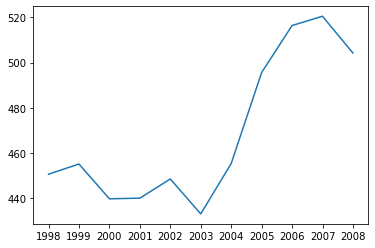

In [12]:
plt.plot(oildata.rolling(window=2).mean())

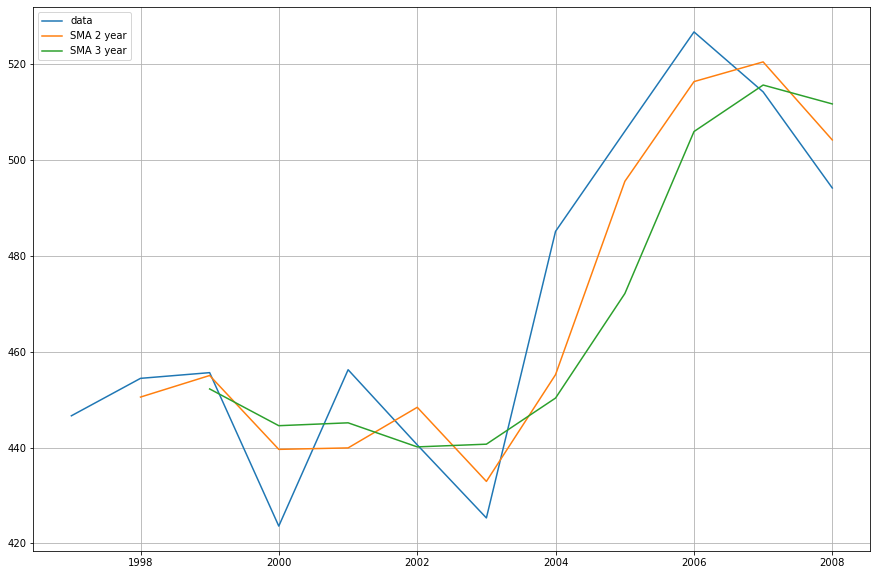

In [14]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(oildata,label='data')
plt.plot(oildata.rolling(window=2).mean(),label='SMA 2 year')
plt.plot(oildata.rolling(window=3).mean(),label='SMA 3 year')
plt.legend(loc=2)

# Exponential smoothing Models

# Simple Exponential smoothing 

In [15]:
from statsmodels.tsa.api import ExponentialSmoothing , SimpleExpSmoothing ,Holt

In [16]:
#Simple Exponential smoothing method ---with alpha=0.20
fit1 = SimpleExpSmoothing(oildata).fit(smoothing_level =0.2,optimized=False)

In [18]:
fit1.fittedvalues

1996-12-31    446.656500
1997-12-31    446.656500
1998-12-31    448.219860
1999-12-31    449.708488
2000-12-31    444.493230
2001-12-31    446.848844
2002-12-31    445.596695
2003-12-31    441.543856
2004-12-31    450.264965
2005-12-31    461.421612
2006-12-31    474.495690
2007-12-31    482.450332
Freq: A-DEC, dtype: float64

In [19]:
fit1.params

{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 446.6565,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [20]:
fit1.params_formatted

,name,param,optimized
smoothing_level,alpha,0.2000,False
initial_level,l.0,446.6565,False


In [22]:
fit1.aic,fit1.aicc,fit1.bic

(87.27855942014656, 92.99284513443227, 88.24837271972257)

In [23]:
#Prediction for next Three year
fcast1 = fit1.forecast(3)
fcast1

2008-12-31    484.802465
2009-12-31    484.802465
2010-12-31    484.802465
Freq: A-DEC, dtype: float64

In [24]:
#Simple Exponential smoothing method ---with alpha=0.6
fit2 = SimpleExpSmoothing(oildata).fit(smoothing_level =0.6,optimized=False)

In [26]:
fcast2 = fit2.forecast(3)
fcast2

2008-12-31    501.837454
2009-12-31    501.837454
2010-12-31    501.837454
Freq: A-DEC, dtype: float64

In [27]:
#Model Selection Criteria(AIC,AICC,BIC)
fit2.aic,fit2.aicc,fit2.bic

(82.17442055451755, 87.88870626880326, 83.14423385409356)

In [28]:
fit3 = SimpleExpSmoothing(oildata).fit()

In [29]:
#Model Selection Criteria(AIC,AICC,BIC)
fit3.aic,fit3.aicc,fit3.bic

(81.36993061586993, 87.08421633015564, 82.33974391544594)

In [30]:
#Compare Model-1,2 and 3 based on AIC,AICc,BIC 

model1fit = fit1.aic,fit1.aicc,fit1.bic
model2fit = fit2.aic,fit2.aicc,fit2.bic
model3fit = fit3.aic,fit3.aicc,fit3.bic

results = (pd.DataFrame(index=['AIC','AICc','BIC'],columns=['Model-1','Model-2','Model-3']))
results['Model-1'] = model1fit
results['Model-2'] = model2fit
results['Model-3'] = model3fit
results

,Model-1,Model-2,Model-3
AIC,87.278559,82.174421,81.369931
AICc,92.992845,87.888706,87.084216
BIC,88.248373,83.144234,82.339744


In [32]:
#Model parameters
fit3.params

{'smoothing_level': 0.892000187865357,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 447.4784833086046,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [33]:
#Accesing the value of Alpha
fit3.params['smoothing_level']

0.892000187865357

# Simple Exponential Smoothing Method: Graphical Comparison

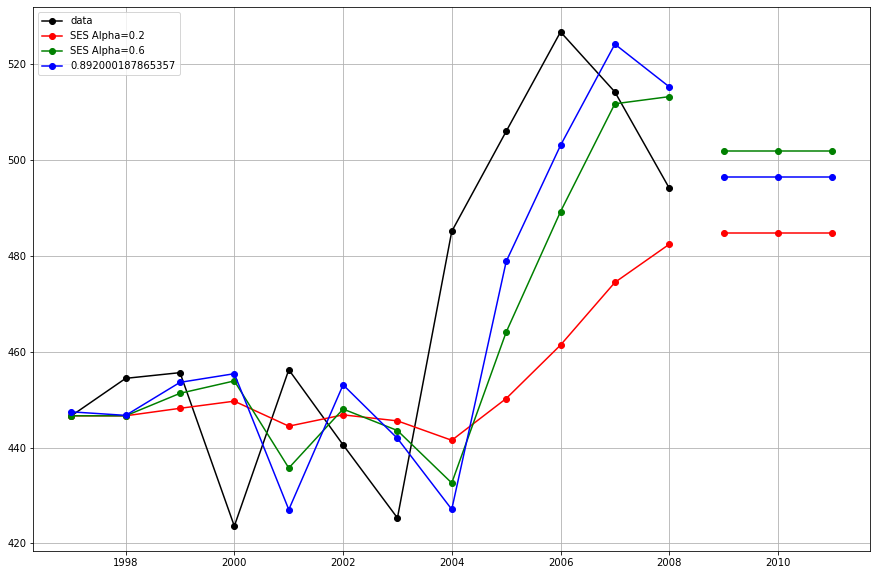

In [37]:
plt.figure(figsize=[15,10])
plt.grid(True)

#Actucal data

plt.plot(oildata,label='data',color='black',marker='o')

#SES with Alpha =0.2

plt.plot(fcast1,label='SES Alpha=0.2',color='red',marker='o')
plt.plot(fit1.fittedvalues,color='red',marker='o')

#SES with Alpha =0.6

plt.plot(fcast2,label='SES Alpha=0.6',color='green',marker='o')
plt.plot(fit2.fittedvalues,color='green',marker='o')

#SES with optimum Alpha
plt.plot(fcast3,label=fit3.params['smoothing_level'],color='blue',marker='o')
plt.plot(fit3.fittedvalues,color='blue',marker='o')


plt.legend(loc=2)

# Holt's Method

In [38]:
#Air Pollustion data

data = [17.55,21.86,23.89,26.93,26.8885,28.83,30.0751,30.9535,30.1857,31.5797,32.5776,33.4774,39.0216,41.39,41.60]
index= pd.date_range(start='1990',end='2005',freq='A')
air = pd.Series(data,index)

In [39]:
air

1990-12-31    17.5500
1991-12-31    21.8600
1992-12-31    23.8900
1993-12-31    26.9300
1994-12-31    26.8885
1995-12-31    28.8300
1996-12-31    30.0751
1997-12-31    30.9535
1998-12-31    30.1857
1999-12-31    31.5797
2000-12-31    32.5776
2001-12-31    33.4774
2002-12-31    39.0216
2003-12-31    41.3900
2004-12-31    41.6000
Freq: A-DEC, dtype: float64

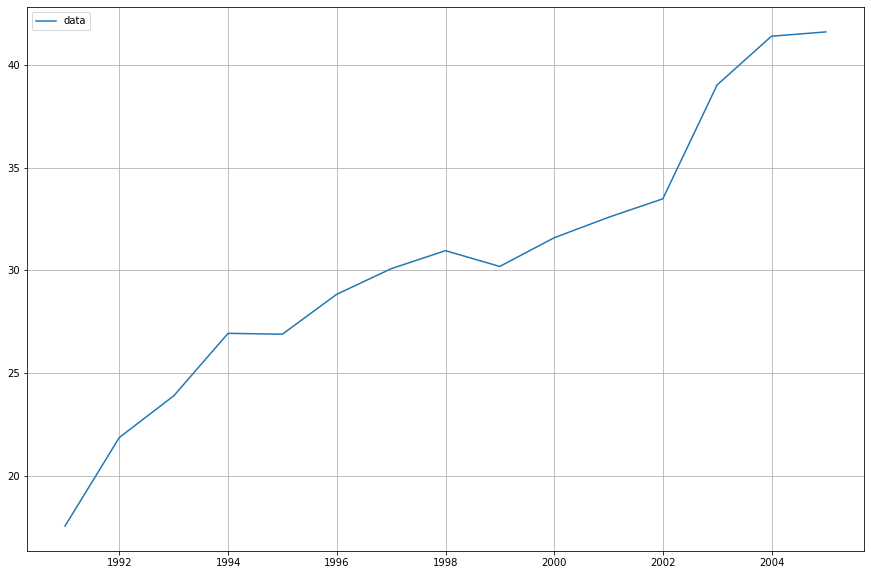

In [40]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(air,label='data')
plt.legend(loc=2)

# Linear trend

In [41]:
fit1= Holt(air).fit(smoothing_level=0.8,smoothing_slope=0.2,optimized=False)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7584\4256307304.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1= Holt(air).fit(smoothing_level=0.8,smoothing_slope=0.2,optimized=False)


In [42]:
fit1.fittedvalues

1990-12-31    21.860000
1991-12-31    22.032400
1992-12-31    25.487296
1993-12-31    27.546708
1994-12-31    30.291917
1995-12-31    30.263212
1996-12-31    31.581357
1997-12-31    32.600065
1998-12-31    33.243076
1999-12-31    32.268258
2000-12-31    33.078325
2001-12-31    33.958543
2002-12-31    34.777443
2003-12-31    40.055649
2004-12-31    43.219506
Freq: A-DEC, dtype: float64

In [43]:
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fcast1

2005-12-31    43.761156
2006-12-31    45.598412
2007-12-31    47.435667
2008-12-31    49.272922
2009-12-31    51.110177
Freq: A-DEC, Name: Holt's linear trend, dtype: float64

# Exponential trend

In [44]:
fit2 = Holt(air,exponential=True).fit(smoothing_level=0.8,smoothing_slope=0.2,optimized=False)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7584\2317477316.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit2 = Holt(air,exponential=True).fit(smoothing_level=0.8,smoothing_slope=0.2,optimized=False)


In [45]:
fit2.fittedvalues

1990-12-31    21.860000
1991-12-31    22.210222
1992-12-31    26.387264
1993-12-31    28.902168
1994-12-31    32.026681
1995-12-31    31.880298
1996-12-31    33.105932
1997-12-31    33.996316
1998-12-31    34.471454
1999-12-31    33.229940
2000-12-31    33.886502
2001-12-31    34.658198
2002-12-31    35.386837
2003-12-31    40.855880
2004-12-31    44.136417
Freq: A-DEC, dtype: float64

In [46]:
fcast2 = fit2.forecast(5).rename("Exponential trend")
fcast2

2005-12-31    44.603554
2006-12-31    47.247812
2007-12-31    50.048831
2008-12-31    53.015904
2009-12-31    56.158877
Freq: A-DEC, Name: Exponential trend, dtype: float64

# Additive damped trend

In [47]:
fit3 = Holt(air,damped=True).fit(smoothing_level=0.8,smoothing_slope=0.2)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7584\1970198510.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit3 = Holt(air,damped=True).fit(smoothing_level=0.8,smoothing_slope=0.2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_7584\1970198510.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit3 = Holt(air,damped=True).fit(smoothing_level=0.8,smoothing_slope=0.2)


In [48]:
fit3.fittedvalues

1990-12-31    17.841181
1991-12-31    20.599497
1992-12-31    24.410329
1993-12-31    26.380675
1994-12-31    28.991993
1995-12-31    28.920032
1996-12-31    30.249184
1997-12-31    31.315277
1998-12-31    32.032990
1999-12-31    31.179698
2000-12-31    32.104028
2001-12-31    33.079806
2002-12-31    33.977630
2003-12-31    39.229980
2004-12-31    42.329638
Freq: A-DEC, dtype: float64

In [50]:
fcast3 = fit3.forecast(5).rename("Additive damped trend")
fcast3

2005-12-31    42.847348
2006-12-31    43.814059
2007-12-31    44.662537
2008-12-31    45.407242
2009-12-31    46.060867
Freq: A-DEC, Name: Additive damped trend, dtype: float64

In [51]:
#Holt's Method:Compare Model-1,2 and 3 based on AIC ,AICc,AND bic
model1fit = fit1.aic,fit1.aicc,fit1.bic
model2fit = fit2.aic,fit2.aicc,fit2.bic
model3fit = fit3.aic,fit3.aicc,fit3.bic

results = (pd.DataFrame(index=['AIC','AICc','BIC'],columns=['Model-1','Model-2','Model-3']))
results['Model-1'] = model1fit
results['Model-2'] = model2fit
results['Model-3'] = model3fit
results

,Model-1,Model-2,Model-3
AIC,31.710407,40.054227,25.241010
AICc,42.210407,50.554227,41.241010
BIC,34.542608,42.886428,28.781261


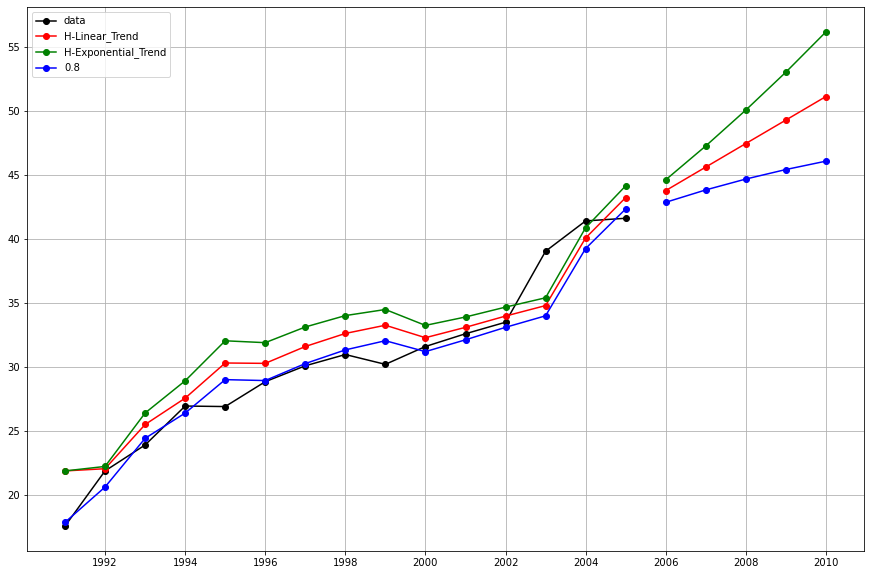

In [52]:
plt.figure(figsize=[15,10])
plt.grid(True)

#Actucal data

plt.plot(air,label='data',color='black',marker='o')

#Holt's Linear Trend 

plt.plot(fcast1,label='H-Linear_Trend',color='red',marker='o')
plt.plot(fit1.fittedvalues,color='red',marker='o')

#Holt's exponentialTrend 

plt.plot(fcast2,label='H-Exponential_Trend',color='green',marker='o')
plt.plot(fit2.fittedvalues,color='green',marker='o')

#Holt's additive damped trend
plt.plot(fcast3,label=fit3.params['smoothing_level'],color='blue',marker='o')
plt.plot(fit3.fittedvalues,color='blue',marker='o')


plt.legend(loc=2)

# Holt's Winters Seasonal

In [55]:
#International visitors in Australia

data=([41.7275,24.0418,32.3281,3.3287,46.2132,29.3463,36.4829,42.9777,48.9015,31.1802,37.7179,40.4202,51.2069,
      31.8872,40.9783,43.7725,55.5586,33.8509,42.0764,45.6423,59.7668,35.1919,44.3197,47.9137])
index = pd.date_range(start='2005',end='2010-Q4',freq='QS-OCT')
aust = pd.Series(data,index)

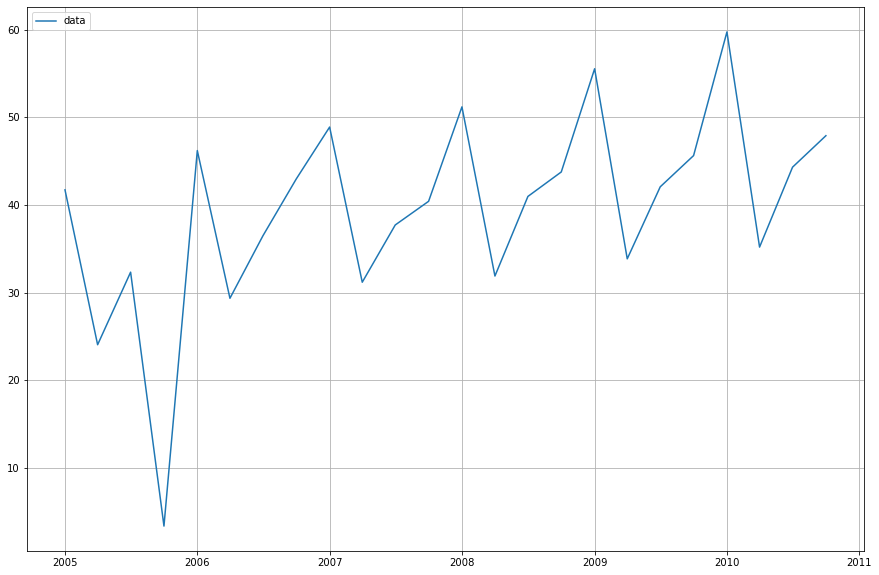

In [56]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(aust,label='data')
plt.legend(loc=2)